# Momin Asif
# Dataset Analysis

# 1a.
I used the Keras Library for the Boston Housing price regression dataset (Keras Toy Dataset) and split the dataset into train and test sets.

In [1]:
import numpy as np #import pandas

import pandas as pd #import pandas

import tensorflow
import keras

from tensorflow.keras.models import Sequential #import Sequential from keras/tenserflow for dense neural network
from tensorflow.keras.layers import Dense #import Dense from keras/tenserflow for dense neural network


In [2]:
from tensorflow.keras.datasets import boston_housing #import Boston Housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data() #split data into train and test sets

In [3]:
print(X_train.shape) #display rows and columns
print(y_train.shape)
print(X_test.shape) #display rows and columns
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


# 1b.
I created the network to have three hidden layers with an arbitrary number of nodes in each layer.

In [4]:
model = Sequential() #create an empty dense neural network
model.add(Dense(32, input_dim=13, activation='relu')) #feed it dense layers with input dimension 13 because that is the amount of columns in training set
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #compress to number between 0-1

# 1c.
I printed the model summary and plotted for the designed model architecture. 

In [5]:
print(model.summary()) #display how model works

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


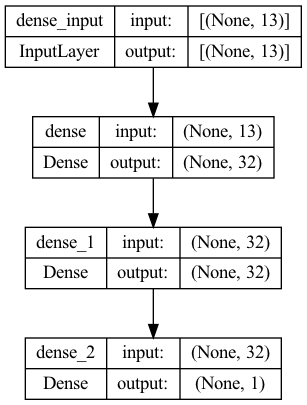

In [6]:
from tensorflow.keras.utils import plot_model #display picture to visualize model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 1d.
I used 20% of my training data as a validation set, and the rest of the data used to train my model. I plotted the loss for each epoch in the training and
validation set.

In [7]:
from keras.callbacks import EarlyStopping,ModelCheckpoint #import EarlyStopping and ModelCheckpoint
es = EarlyStopping(patience=50) #stop training when it starts getting worse the more you train it 
mc = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True) #save model when it finishes training based on loss
model.compile(loss='mae', optimizer='adam') #compile the keras model
history = model.fit(X_train, y_train, epochs=500, batch_size=100,  validation_split=0.2, callbacks=[es,mc]) #20 percent as validation set

Epoch 1/500
4/4 [==============================] - 0s 25ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 11

/Users/mominasif/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 15/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 16/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 17/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 18/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 19/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 20/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 21/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 22/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 23/500
4/4 [==============================] - 0s 5ms/step - loss: 21.0814 - val_loss: 22.6457
Epoch 24/500


<Axes: >

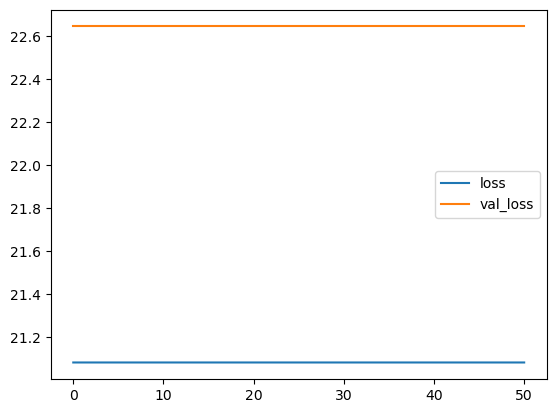

In [8]:
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot()

# 1e.
Based on the plot, I tuned the hyperparameters of the network so that it does not overfit. I used EarlyStopping and ModelCheckpoint to save the best model based on the performance of the validation set.

In [9]:
from keras.callbacks import EarlyStopping,ModelCheckpoint #import EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30) #stop training when it starts getting worse the more you train it and monitor loss
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) #save model when it finishes training based on accuracy

# 1f.
I loaded the best-saved model and evaluate my model's performance in terms of MAE (Mean absolute error) for the test set.

In [10]:
MAE = model.evaluate(X_test, y_test) #evaluate the keras model MAE
print('Mean Absolute Error: %.2f' % (MAE*100))

4/4 [==============================] - 0s 3ms/step - loss: 22.0784
Mean Absolute Error: 2207.84


# 2a.
I used the Keras Library for the CIFAR10 small images classification dataset (Keras Toy Dataset) and split the dataset into train and test sets.

In [11]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [12]:
print(X_train.shape) #display rows and columns
print(y_train.shape)
print(X_test.shape) #display rows and columns
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
X_train = X_train.reshape((50000, 32, 32, 3, 1)) #rehsape by 1 dimension
print(X_train.shape)

(50000, 32, 32, 3, 1)


In [14]:
X_train = X_train.astype('float32') / 255 #normalize values to numbers between 0-1
X_train[1]

array([[[[0.6039216 ],
         [0.69411767],
         [0.73333335]],

        [[0.49411765],
         [0.5372549 ],
         [0.53333336]],

        [[0.4117647 ],
         [0.40784314],
         [0.37254903]],

        ...,

        [[0.35686275],
         [0.37254903],
         [0.2784314 ]],

        [[0.34117648],
         [0.3529412 ],
         [0.2784314 ]],

        [[0.30980393],
         [0.31764707],
         [0.27450982]]],


       [[[0.54901963],
         [0.627451  ],
         [0.6627451 ]],

        [[0.5686275 ],
         [0.6       ],
         [0.6039216 ]],

        [[0.49019608],
         [0.49019608],
         [0.4627451 ]],

        ...,

        [[0.3764706 ],
         [0.3882353 ],
         [0.30588236]],

        [[0.3019608 ],
         [0.3137255 ],
         [0.24313726]],

        [[0.2784314 ],
         [0.28627452],
         [0.23921569]]],


       [[[0.54901963],
         [0.60784316],
         [0.6431373 ]],

        [[0.54509807],
         [0.57254905],

In [15]:
X_test = X_test.reshape((10000, 32, 32, 3, 1))
X_test.shape

(10000, 32, 32, 3, 1)

In [16]:
X_test = X_test.astype('float32') / 255 #data between 0-1

In [17]:
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train) #change y's to categorical
y_train.shape

(50000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

# 2b.
I made a network that will take the pixel values (color image- three-dimensional array) as input. I have an arbitrary number of convolution layers, Maxpooling layers and dense layers to design the network. The network architecture, thenumber of filters, and kernel size are adjusted to avoid overfitting.

In [20]:
from tensorflow.keras.models import Sequential #import Sequential
cnn = Sequential() #typical sequential model

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D #import Conv2d, Dense, Flatten, and MaxPooling2D
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) #first layer with 64 filters with Conv2D; handle 1 picture at a time
cnn.add(MaxPooling2D(pool_size=(2, 2))) #second layer with MaxPooling2D that will compress array down by a factor of 2
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #third layer with 128 filters
cnn.add(MaxPooling2D(pool_size=(2, 2))) #fourth layer of MaxPooling2D for compressing
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) 
cnn.add(MaxPooling2D(pool_size=(2, 2))) 
cnn.add(Flatten()) #flatten layer to make data a single flat array
cnn.add(Dense(units=128, activation='relu')) #add dense layers to compress input
cnn.add(Dense(units=10, activation='softmax'))

# 2c.
I printed the summary and plot the architecture of the network. 

In [21]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        

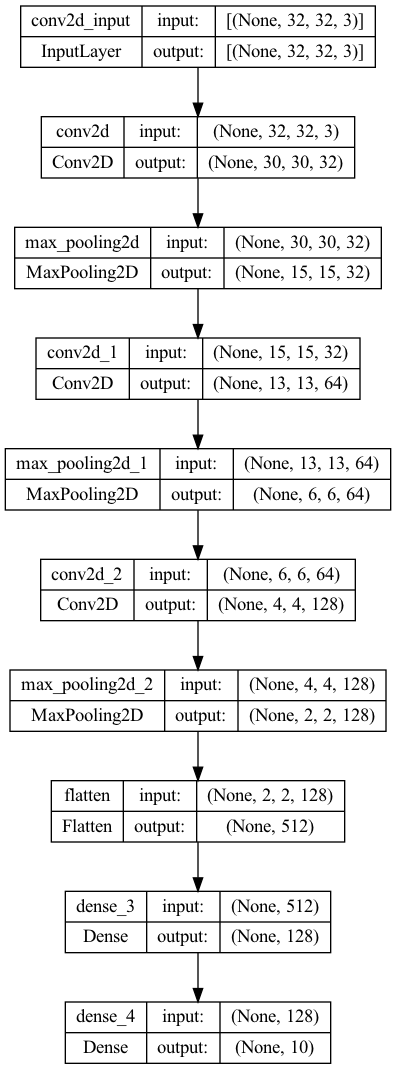

In [22]:
from tensorflow.keras.utils import plot_model #import plot
from IPython.display import Image #import image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True) 
Image(filename='convnet.png') 

# 2d.
I used 20% of the training data as a validation set, and the rest of the data was used to train the model. I plotted the loss and accuracy for each epoch in the training and validation set.

In [23]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],) #compile model
from keras.callbacks import EarlyStopping,ModelCheckpoint #import EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100) #stop training when it starts getting worse the more you train it and monitor loss
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) #save model when it finishes training based on accuracy
history2 = cnn.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2, callbacks=[es,mc]) #fit the data with 20 percent validation split

Epoch 1/5
399/400 [============================>.] - ETA: 0s - loss: 1.6612 - accuracy: 0.3880
Epoch 1: val_accuracy improved from -inf to 0.47650, saving model to best_model.h5
400/400 [==============================] - 10s 25ms/step - loss: 1.6608 - accuracy: 0.3882 - val_loss: 1.4365 - val_accuracy: 0.4765
Epoch 2/5
  7/400 [..............................] - ETA: 8s - loss: 1.3720 - accuracy: 0.5271

/Users/mominasif/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


399/400 [============================>.] - ETA: 0s - loss: 1.2613 - accuracy: 0.5510
Epoch 2: val_accuracy improved from 0.47650 to 0.55890, saving model to best_model.h5
400/400 [==============================] - 10s 24ms/step - loss: 1.2612 - accuracy: 0.5511 - val_loss: 1.2586 - val_accuracy: 0.5589
Epoch 3/5
398/400 [============================>.] - ETA: 0s - loss: 1.1062 - accuracy: 0.6103
Epoch 3: val_accuracy improved from 0.55890 to 0.62490, saving model to best_model.h5
400/400 [==============================] - 10s 24ms/step - loss: 1.1054 - accuracy: 0.6104 - val_loss: 1.0778 - val_accuracy: 0.6249
Epoch 4/5
398/400 [============================>.] - ETA: 0s - loss: 1.0026 - accuracy: 0.6484
Epoch 4: val_accuracy improved from 0.62490 to 0.63520, saving model to best_model.h5
400/400 [==============================] - 10s 24ms/step - loss: 1.0024 - accuracy: 0.6483 - val_loss: 1.0500 - val_accuracy: 0.6352
Epoch 5/5
400/400 [==============================] - ETA: 0s - loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


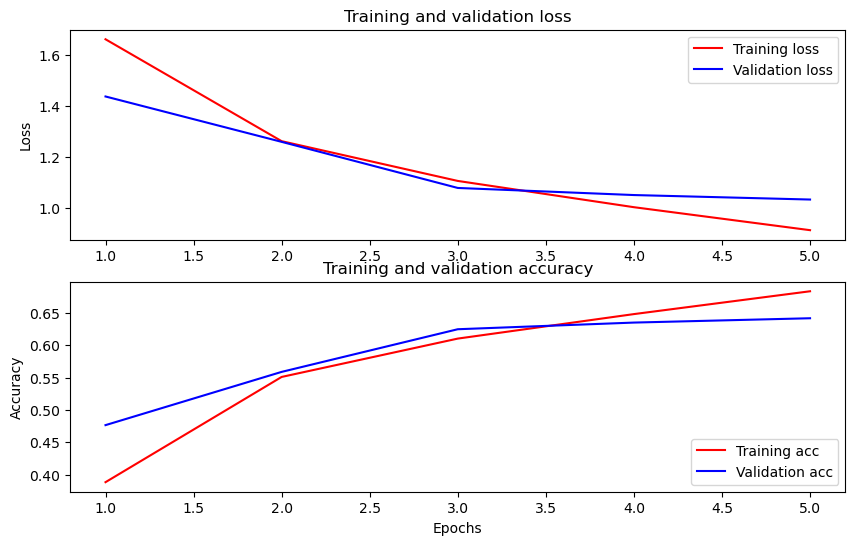

In [24]:

history_dict = history2.history #plotting the loss for each epoch
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)

plt.plot(epochs, loss, 'r', label='Training loss') #show what is being plotted

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') #title the graph
plt.xlabel('Epochs') #label the graph
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# 2e.
I tuned the hyperparameters of the network so that it does not overfit the training data. I used EarlyStopping to stop the training if there is no improvement and ModelCheckpoint to save the best model based on the validation set.

In [25]:
from keras.callbacks import EarlyStopping,ModelCheckpoint #import EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30) #stop training when it starts getting worse the more you train it and monitor loss
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) #save model when it finishes training based on accuracy

# 2f.
I loaded the best-saved model and evaluate my model's performance in terms of accuracy for the test set.

In [26]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0435 - accuracy: 0.6340


In [27]:
loss

1.0434818267822266

In [28]:
accuracy

0.6340000033378601

In [29]:
import tensorflow
tensorflow.keras.models.load_model('best_model.h5')